In [2]:
import sqlalchemy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import PurePath
from typing import Tuple

# Untersuchung  HTW Berlin Datensatz
In diesem Notebook schaue ich den Datensatz an den ich mittels der Daten von HTW Berlin und dem PVGIS ersellt habe. 


In [4]:
path = PurePath('../additional_datasets/htw_berlin/dataset.csv')
df = pd.read_csv(path, index_col=0,parse_dates=True)
df.head()

,prosumer0_consumption,prosumer1_consumption,prosumer2_consumption,prosumer3_consumption,prosumer4_consumption,prosumer5_consumption,prosumer6_consumption,prosumer7_consumption,prosumer8_consumption,prosumer9_consumption,...,prosumer64_pv,prosumer65_pv,prosumer66_pv,prosumer67_pv,prosumer68_pv,prosumer69_pv,prosumer70_pv,prosumer71_pv,prosumer72_pv,prosumer73_pv
2009-12-31 23:00:00+00:00,0.001583,0.008350,0.006717,0.001017,0.005950,0.000950,0.004817,0.012300,0.010700,0.020900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-31 23:01:00+00:00,0.003167,0.016333,0.013800,0.002033,0.011850,0.001683,0.010500,0.024617,0.021400,0.044583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-31 23:02:00+00:00,0.004750,0.023817,0.021467,0.003050,0.017750,0.002417,0.019383,0.036850,0.032033,0.067833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-31 23:03:00+00:00,0.006333,0.031533,0.029600,0.004067,0.023633,0.003150,0.027600,0.049050,0.042650,0.091083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-31 23:04:00+00:00,0.007983,0.038267,0.038650,0.005083,0.028633,0.003883,0.036017,0.061217,0.053300,0.102217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def prosumer_col_names(i: int) -> Tuple[str, str]:
    base = "prosumer%d_%s"
    return (base % (i, "consumption"), base % (i, "pv"))


num_prosumers = df.shape[1] // 2
prosumer_col_names(0)


('prosumer0_consumption', 'prosumer0_pv')

In [6]:
yearly_consumption = np.array( [df[prosumer_col_names(i)[0]][-1] for i in range(num_prosumers)])

# Durschnittlicher Stromverbrauch Datensatz
Der Datensatz beschreibt 74 Einfamilienhäuser.
Laut [stromauskunft.de](https://www.stromauskunft.de/stromverbrauch/wie-hoch-ist-der-stromverbrauch-im-einfamilienhaus/) liegt der Durchschnittliche Stromverbrauch von 4-Personen-Haushalten bei 4000 bis 5000 kWh pro Jahr, daher ergeben Durchschnittlich 4685kWh Strom pro Jahr Sinn.

Durchschnittlicher Verbrauch: 4685.07 kWh


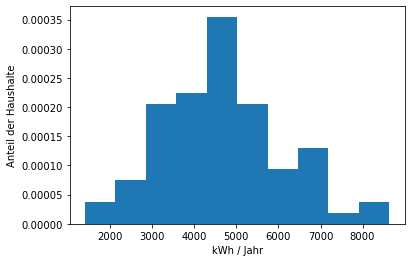

In [7]:
fig, ax = plt.subplots()

print("Durchschnittlicher Verbrauch: %.2f kWh" % (yearly_consumption.mean()))
ax.set_xlabel("kWh / Jahr")
ax.set_ylabel("Anteil der Haushalte")
ax.hist(yearly_consumption, density=True);

# Tageslastprofil

In [8]:
df_diff = df.diff()
consumption_cols = [prosumer_col_names(i)[0] for i in range(num_prosumers)]
hourly = df_diff[consumption_cols].resample('1H').sum().groupby(lambda x: x.hour).mean()

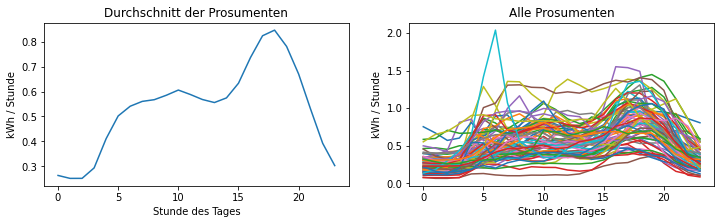

In [9]:
fig, axs = plt.subplots(1,2, figsize=(12,3))

ax = axs[0]
hourly_mean_across_prosumers = hourly.mean(axis=1)
ax.plot(hourly_mean_across_prosumers)
ax.set_ylabel("kWh / Stunde")
ax.set_title("Durchschnitt der Prosumenten")
ax.set_xlabel("Stunde des Tages");

ax = axs[1]
ax.plot(hourly);
ax.set_title("Alle Prosumenten")
ax.set_ylabel("kWh / Stunde")
ax.set_xlabel("Stunde des Tages");

# Durchschnittliche Stromerzeugung

In [10]:
yearly_generation = np.array( [df[prosumer_col_names(i)[1]][-1] for i in range(num_prosumers)])

Durchschnittlicher Erzeugung: 8036.40 kWh


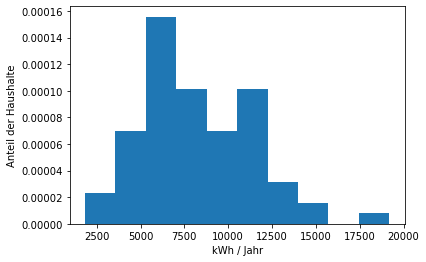

In [12]:
fig, ax = plt.subplots()

print("Durchschnittlicher Erzeugung: %.2f kWh" % (yearly_generation.mean()))
ax.set_xlabel("kWh / Jahr")
ax.set_ylabel("Anteil der Haushalte")
ax.hist(yearly_generation, density=True);

In [13]:
generation_cols = [prosumer_col_names(i)[1] for i in range(num_prosumers)]
hourly_generation = df_diff[generation_cols].resample('1H').sum().groupby(lambda x: x.hour).mean()

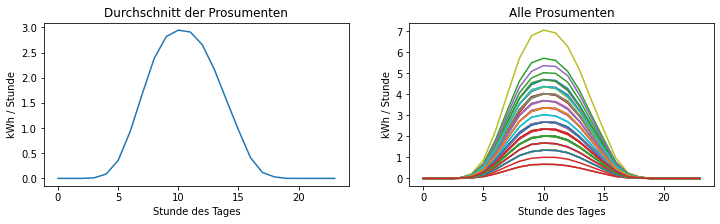

In [14]:
fig, axs = plt.subplots(1,2, figsize=(12,3))

ax = axs[0]
generation_mean_across_prosumers = hourly_generation.mean(axis=1)
ax.plot(generation_mean_across_prosumers)
ax.set_ylabel("kWh / Stunde")
ax.set_title("Durchschnitt der Prosumenten")
ax.set_xlabel("Stunde des Tages");

ax = axs[1]
ax.plot(hourly_generation);
ax.set_title("Alle Prosumenten")
ax.set_ylabel("kWh / Stunde")
ax.set_xlabel("Stunde des Tages");

In [23]:
monthly_generation = df_diff[generation_cols].groupby(lambda x: x.month).sum()

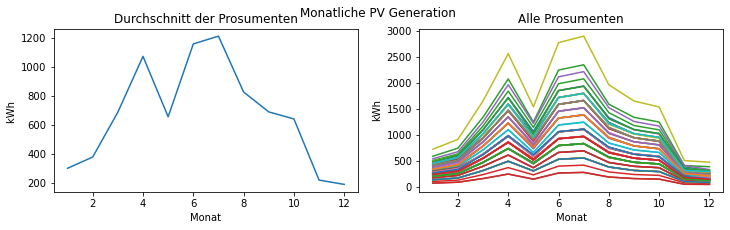

In [25]:
fig, axs = plt.subplots(1,2, figsize=(12,3))
fig.suptitle("Monatliche PV Generation")
ax = axs[0]
generation_mean_across_prosumers = monthly_generation.mean(axis=1)
ax.plot(generation_mean_across_prosumers)
ax.set_ylabel("kWh ")
ax.set_title("Durchschnitt der Prosumenten")
ax.set_xlabel("Monat");

ax = axs[1]
ax.plot(monthly_generation);
ax.set_title("Alle Prosumenten")
ax.set_ylabel("kWh")
ax.set_xlabel("Monat");

Der einbruch an PV-Produktion im Mai passt, der Mai 2010 war extrem Niederschlagsreich und mit wenigen Sonnenstunden.